<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clustering

### K-Means
#### Generating some blobs data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

### Training K-Means

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # n_init is now a required parameter
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [3]:
kmeans.labels_ # Cluster labels for each instance

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 3, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 0, 3, 2, 2, 0, 1, 0,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 3, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 3, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 3, 1, 2, 0, 3, 2, 0, 2, 1, 0, 3, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [4]:
kmeans.cluster_centers_ # Coordinates of the cluster centroids

array([[-2.50173875,  9.03287546],
       [-6.74543497, -6.81351756],
       [ 4.65760511,  2.0269603 ],
       [-8.85662684,  7.41339818]])

In [5]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 0, 0], dtype=int32)

In [6]:
kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center

1948.732919385683

### Finding the Optimal Number of Clusters (Elbow Method & Silhouette Score)




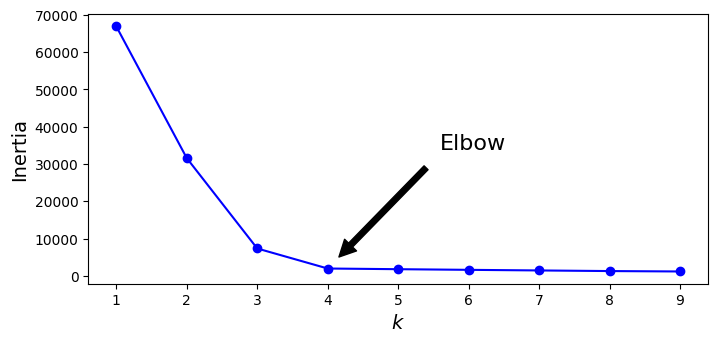

In [7]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Plotting the elbow curve would require matplotlib
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel(r"$k$", fontsize=14) # Perbaikan di sini
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

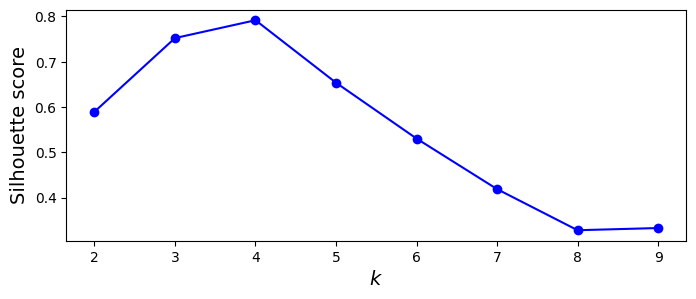

In [8]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]] # Start from k=2

# Plotting the silhouette scores
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel(r"$k$", fontsize=14) # Perbaikan di sini
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

### Pre-processing and Post-processing

In [9]:
# K-Means as a preprocessing step (example: feature scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=4, random_state=42, n_init=10))
])
pipeline.fit(X)
X_transformed = pipeline.transform(X) # Distances to cluster centroids

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)
X_dist = kmeans.transform(X)

### Mini-Batch K-Means

In [11]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42, n_init=10)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=4, n_init=10, random_state=42)

##DBSCAN

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons # Using moons dataset for DBSCAN example

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5) # eps: max distance between samples, min_samples: min samples in a neighborhood
dbscan.fit(X)

DBSCAN(eps=0.2)

In [13]:
dbscan.labels_ # -1 indicates noise points

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,

In [14]:
# Accessing core samples
dbscan.core_sample_indices_
dbscan.components_ # Core samples

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [16]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

y_pred = dbscan.labels_
unique_labels = np.unique(y_pred[y_pred != -1])

mapped_y_pred = np.full_like(y_pred, fill_value=-1)
for label in unique_labels:
    mask = (y_pred == label)
    if np.any(mask):
        mapped_label = mode(y[mask], keepdims=True)[0][0]
        mapped_y_pred[mask] = mapped_label
accuracy_score(y[y_pred != -1], mapped_y_pred[y_pred != -1])

1.0

##Gaussian Mixtures

In [17]:
from sklearn.mixture import GaussianMixture

# Creating some data for Gaussian Mixture
X_gm, y_gm = make_blobs(n_samples=1000, centers=3, cluster_std=[0.5, 1.5, 2.5], random_state=42)

# Default is full covariance_type
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_gm)

GaussianMixture(n_components=3, random_state=42)

In [18]:
gm.weights_ # Weights of each Gaussian component

array([0.334     , 0.33299449, 0.33300551])

In [19]:
gm.means_ # Mean of each Gaussian component

array([[-2.51666971,  9.00911449],
       [ 4.77304845,  2.09682169],
       [-6.84681008, -6.6427242 ]])

In [20]:
gm.covariances_ # Covariance matrix of each Gaussian component

array([[[ 2.53921159e-01,  1.42669540e-03],
        [ 1.42669540e-03,  2.36517868e-01]],

       [[ 1.82317110e+00, -1.51827321e-01],
        [-1.51827321e-01,  2.46023542e+00]],

       [[ 5.95063112e+00,  3.95507586e-01],
        [ 3.95507586e-01,  6.47030586e+00]]])

In [21]:
gm.predict(X_gm[:10]) # Hard assignment to components

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1])

In [22]:
gm.predict_proba(X_gm[:10]) # Soft assignment (probabilities)

array([[3.81951763e-261, 2.50437659e-024, 1.00000000e+000],
       [1.15458111e-214, 7.99806429e-019, 1.00000000e+000],
       [6.06731868e-099, 9.99999991e-001, 8.72793745e-009],
       [1.00000000e+000, 3.10067830e-011, 4.39292068e-010],
       [9.99999998e-001, 2.04987973e-010, 1.84092384e-009],
       [1.65757796e-226, 1.20328287e-023, 1.00000000e+000],
       [1.21481006e-085, 9.99999994e-001, 5.53850670e-009],
       [2.20530504e-101, 9.99999998e-001, 2.46515460e-009],
       [1.05313656e-070, 9.99999997e-001, 3.04867387e-009],
       [1.66255637e-131, 9.99999987e-001, 1.31613512e-008]])

In [23]:
# To generate new samples from the model
X_new_gm, y_new_gm = gm.sample(6)

### Anomaly Detection using Gaussian Mixtures

In [24]:
densities = gm.score_samples(X_gm)

In [25]:
# Set a threshold for anomaly detection
threshold = np.percentile(densities, 4) # e.g., bottom 4% are anomalies
anomalies = X_gm[densities < threshold]

### Selecting Number of Components (BIC or AIC)

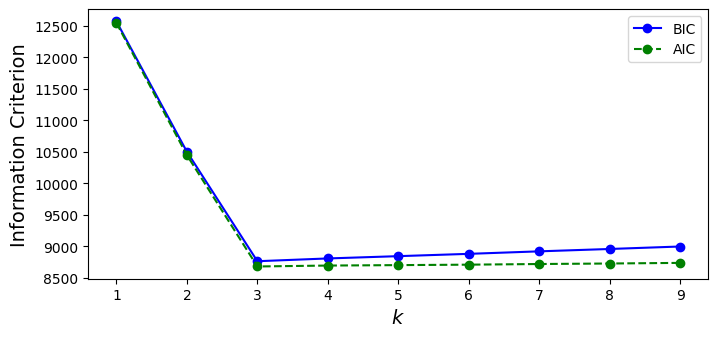

In [26]:
bics = [gm.bic(X_gm) for gm in [GaussianMixture(n_components=k, random_state=42).fit(X_gm)
                               for k in range(1, 10)]]
aics = [gm.aic(X_gm) for gm in [GaussianMixture(n_components=k, random_state=42).fit(X_gm)
                               for k in range(1, 10)]]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), bics, "bo-", label="BIC")
plt.plot(range(1, 10), aics, "go--", label="AIC")
plt.xlabel(r"$k$", fontsize=14) # Perbaikan di sini
plt.ylabel("Information Criterion", fontsize=14)
plt.legend()
plt.show()

### Variational Bayesian Gaussian Mixtures

In [27]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, random_state=42, n_init=10)
bgm.fit(X_gm)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [28]:
bgm.weights_.round(2)

array([0.33, 0.33, 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])